In [1]:
import pandas as pd
import CococoNet_reader 
import pickle 
import tqdm
import Name_resolver
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
Name_resolver.species_name_resolver('Oryza sativa japonica')

'rice_jp'

In [3]:
species_with_nets = pd.read_csv('/data/passala/Generated_Tables/Reference_tables/Species_name_resolver.csv')
species_with_nets = species_with_nets[:18]
# # species_with_nets = species_with_nets.drop(index = [13,14])
# # species_with_nets.loc[0,'Taxa ID'] = 39947 
taxa_to_keep = species_with_nets['Taxa ID'].to_list()
taxa_to_keep

[4530,
 39947,
 3750,
 4558,
 4577,
 29760,
 3711,
 3847,
 3880,
 4097,
 4113,
 4081,
 3702,
 3818,
 4565,
 3659,
 1753,
 15368]

In [4]:
species_with_nets_to_run = species_with_nets.loc[~species_with_nets['Common Name'].isin(['rice','wheat','rapeseed'])]
species_with_nets_to_run

,Species,Taxa ID,Common Name
1,Oryza sativa japonica,39947,rice_jp
2,Malus domestica,3750,apple
3,Sorghum bicolor,4558,sorghum
4,Zea mays,4577,maize
5,Vitis vinifera,29760,grape
6,Brassica rapa,3711,mustard
7,Glycine max,3847,soybean
8,Medicago truncatula,3880,medicago
9,Nicotiana tabacum,4097,tobacco
10,Solanum tuberosum,4113,potato


In [5]:
species_with_nets_to_run.to_csv('/data/passala/Generated_Tables/Reference_tables/species_for_running_cross_ortho_analysis.csv',index = False)

In [6]:
og_groups = pd.read_csv('/data/passala/OrthoDB_data/NCBI_data/eukaryota_level_stuff/og_2_Genes_with_network_id.csv')
og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,0at2759,15368_0:006377,15368,2759,15368_0:006377,psbD
1,0at2759,29760_0:006494,29760,2759,29760_0:006494,psbD
2,0at2759,3659_0:004e0f,3659,2759,3659_0:004e0f,psbD
3,0at2759,3702_0:006ad0,3702,2759,3702_0:006ad0,psbD
4,0at2759,3711_0:005e40,3711,2759,3711_0:005e40,LOC117126101
...,...,...,...,...,...,...
505254,9at2759,4097_0:00f00f,4097,2759,4097_0:00f00f,petD
505255,9at2759,4113_0:00079d,4113,2759,4113_0:00079d,LOC107063147
505256,9at2759,4113_0:006ebb,4113,2759,4113_0:006ebb,petD
505257,9at2759,4558_0:006df8,4558,2759,4558_0:006df8,petD


In [38]:
og_groups.groupby(by = ['Orthogroup','Species']).count().mean()

Gene            2.669585
Ortholevel      2.669585
Orthodb Gene    2.669585
Symbol          2.669585
dtype: float64

In [7]:
egad_scores = pd.read_csv('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/Orthogroups_at_eukaryote_level/Ortho_cross_all_tables/egad_scores_orthogroups_base_1.csv',index_col= 0)

In [8]:
egad_scores

,rice_jp AUC,rice_jp P_Value,apple AUC,apple P_Value,sorghum AUC,sorghum P_Value,maize AUC,maize P_Value,grape AUC,grape P_Value,...,tomato AUC,tomato P_Value,arabidopsis AUC,arabidopsis P_Value,peanut AUC,peanut P_Value,cucumber AUC,cucumber P_Value,brome AUC,brome P_Value
0at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000005at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.999910,0.022774,NaN,NaN,NaN,NaN
1000251at2759,0.500000,0.500000,0.918895,0.008907,0.950249,0.03586,NaN,NaN,0.956381,0.014631,...,NaN,NaN,0.983862,0.010065,0.970977,0.004855,NaN,NaN,NaN,NaN
1000411at2759,0.847470,0.082298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.529418,0.453167
10004at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.950597,0.014485,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999128at2759,0.748916,0.004395,0.677356,0.002132,0.781389,0.01260,0.742726,0.00087,0.728292,0.002450,...,0.693992,0.002274,0.524361,0.096362,0.796060,0.000002,0.786855,0.000112,0.762024,0.003996
999249at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.500000,NaN,NaN
999348at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.985562,0.026060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999732at2759,NaN,NaN,0.473355,0.457563,0.500000,0.50000,NaN,NaN,0.178873,0.075897,...,NaN,NaN,0.584168,0.358473,0.786390,0.022477,0.431321,0.391774,NaN,NaN


In [9]:
def get_fc_table(species_1,species_2):
    """Takes two species common names in any order and returns the N to M table for that pair with species_1 as column 1 and species_2 as column 2 

    Args:
        species_1 (str): species common name
        species_2 (str): species common name

    Returns:
        str: All N-M gene pairs
    """
    import pandas as pd
    import os 

    list_of_files = os.listdir('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/Orthogroups_at_eukaryote_level/1_1_ortho_FC_tables_eukaryote')
    trimmed_to_species_1 = list(filter(lambda x:species_1 in x, list_of_files))
    final_file = list(filter(lambda x: species_2 in x, trimmed_to_species_1))[0]
    formatted_final_file = f"/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/Orthogroups_at_eukaryote_level/1_1_ortho_FC_tables_eukaryote/{final_file}"
    read_in_file = pd.read_csv(formatted_final_file, index_col= 0)

    return read_in_file

In [10]:
current_table = get_fc_table('rice_jp','soybean')

In [11]:
current_table

,rice_jp and soybean,Species 1 Score,Species 2 Score,Total Score
0,1207831at2759,0.875726,0.870828,0.873277
1,460688at2759,0.484049,0.614222,0.549135
2,468348at2759,0.647441,0.611939,0.629690
3,169081at2759,0.710965,0.732087,0.721526
4,358392at2759,0.711386,0.806672,0.759029
...,...,...,...,...
5695,5387420at2759,0.716531,0.674603,0.695567
5696,3614431at2759,0.987306,0.971750,0.979528
5697,1205168at2759,0.620455,0.875779,0.748117
5698,5487044at2759,0.907927,0.916320,0.912124


In [12]:
current_species_taxa = species_with_nets_to_run.loc[species_with_nets_to_run['Common Name'] == 'grape']['Taxa ID'].item()

In [13]:
current_og_groups = og_groups.loc[og_groups['Species']==current_species_taxa]
current_og_groups = current_og_groups.loc[current_og_groups['Orthogroup'].isin(egad_scores.index)]

In [14]:
current_og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
1,0at2759,29760_0:006494,29760,2759,29760_0:006494,psbD
14,1000005at2759,29760_0:003bb2,29760,2759,29760_0:003bb2,LOC104881169
15,1000005at2759,29760_0:003c87,29760,2759,29760_0:003c87,LOC104881144
38,1000251at2759,29760_0:00157c,29760,2759,29760_0:00157c,LOC100242675
39,1000251at2759,29760_0:001e82,29760,2759,29760_0:001e82,LOC100242917
...,...,...,...,...,...,...
505148,999348at2759,29760_0:004a5c,29760,2759,29760_0:004a5c,LOC100852581
505189,999732at2759,29760_0:001906,29760,2759,29760_0:001906,LOC100255395
505190,999732at2759,29760_0:0026ee,29760,2759,29760_0:0026ee,LOC100264950
505191,999732at2759,29760_0:0056ed,29760,2759,29760_0:0056ed,LOC100248971


In [15]:
current_table

,rice_jp and soybean,Species 1 Score,Species 2 Score,Total Score
0,1207831at2759,0.875726,0.870828,0.873277
1,460688at2759,0.484049,0.614222,0.549135
2,468348at2759,0.647441,0.611939,0.629690
3,169081at2759,0.710965,0.732087,0.721526
4,358392at2759,0.711386,0.806672,0.759029
...,...,...,...,...
5695,5387420at2759,0.716531,0.674603,0.695567
5696,3614431at2759,0.987306,0.971750,0.979528
5697,1205168at2759,0.620455,0.875779,0.748117
5698,5487044at2759,0.907927,0.916320,0.912124


In [16]:
current_table.columns[0]

'rice_jp and soybean'

In [17]:
merged_groups = current_og_groups.merge(how = 'left', left_on = "Orthogroup",right_on=current_table.columns[0], right = current_table.iloc[:,[0,3]]  )

In [18]:
merged_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol,rice_jp and soybean,Total Score
0,0at2759,29760_0:006494,29760,2759,29760_0:006494,psbD,NaN,NaN
1,1000005at2759,29760_0:003bb2,29760,2759,29760_0:003bb2,LOC104881169,NaN,NaN
2,1000005at2759,29760_0:003c87,29760,2759,29760_0:003c87,LOC104881144,NaN,NaN
3,1000251at2759,29760_0:00157c,29760,2759,29760_0:00157c,LOC100242675,1000251at2759,0.693890
4,1000251at2759,29760_0:001e82,29760,2759,29760_0:001e82,LOC100242917,1000251at2759,0.693890
...,...,...,...,...,...,...,...,...
22807,999348at2759,29760_0:004a5c,29760,2759,29760_0:004a5c,LOC100852581,NaN,NaN
22808,999732at2759,29760_0:001906,29760,2759,29760_0:001906,LOC100255395,999732at2759,0.839865
22809,999732at2759,29760_0:0026ee,29760,2759,29760_0:0026ee,LOC100264950,999732at2759,0.839865
22810,999732at2759,29760_0:0056ed,29760,2759,29760_0:0056ed,LOC100248971,999732at2759,0.839865


In [19]:
merged_groups.groupby('Orthogroup').mean().dropna()

/tmp/ipykernel_339654/735756621.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_groups.groupby('Orthogroup').mean().dropna()


,Species,Ortholevel,Total Score
Orthogroup,,,
1000251at2759,29760.0,2759.0,0.693890
1000582at2759,29760.0,2759.0,0.825819
1000700at2759,29760.0,2759.0,0.975990
1000728at2759,29760.0,2759.0,0.719665
10009at2759,29760.0,2759.0,0.648336
...,...,...,...
997839at2759,29760.0,2759.0,0.753744
997998at2759,29760.0,2759.0,0.731595
998957at2759,29760.0,2759.0,0.825529


/tmp/ipykernel_339654/1654839291.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.histplot(merged_groups.groupby('Orthogroup').mean().dropna()['Total Score'])


<AxesSubplot:xlabel='Total Score', ylabel='Count'>

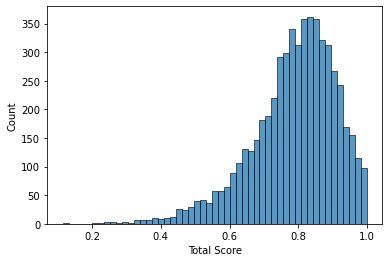

In [20]:
sns.histplot(merged_groups.groupby('Orthogroup').mean().dropna()['Total Score'])

In [21]:
all_fc_scores = pd.DataFrame(index = egad_scores.index)
all_fc_scores

""
0at2759
1000005at2759
1000251at2759
1000411at2759
10004at2759
...
999128at2759
999249at2759
999348at2759
999732at2759


In [22]:
list_of_species_to_run_on = species_with_nets_to_run['Common Name'].to_list()


In [23]:
plant_combinations = list(itertools.permutations(list_of_species_to_run_on,2))

In [24]:
for species in list_of_species_to_run_on:
    print(species)
    combos_that_start_with_species = []


    for combo in plant_combinations:
        if combo[0] == species:
            combos_that_start_with_species.append(combo)



    species_specific_df = pd.DataFrame(index = egad_scores.index)
    outer_loop_species_taxa = Name_resolver.species_name_resolver(species,'taxa_id' )
    current_og_groups = og_groups.loc[og_groups['Species']==outer_loop_species_taxa]
    current_og_groups = current_og_groups.loc[current_og_groups['Orthogroup'].isin(egad_scores.index)]
   
    



    for current_combination in combos_that_start_with_species:
        current_table =get_fc_table(current_combination[0],current_combination[1])
        current_species_taxa = species_with_nets_to_run.loc[species_with_nets_to_run['Common Name'] == current_combination[0]]['Taxa ID'].item()
        merged_groups = current_og_groups.merge(how = 'left', left_on = "Orthogroup",right_on=current_table.columns[0], right = current_table.iloc[:,[0,3]] )
        mean_fc = merged_groups[['Orthogroup','Total Score']].groupby('Orthogroup').mean()
        species_specific_df = species_specific_df.merge(right = mean_fc,left_index=True,right_index=True, how = 'left')
        species_specific_df = species_specific_df.rename(columns={'Total Score':current_combination[1]})

    mean_across_species = species_specific_df.mean(axis = 1)
    all_fc_scores[species] = mean_across_species



rice_jp
apple
sorghum
maize
grape
mustard
soybean
medicago
tobacco
potato
tomato
arabidopsis
peanut
cucumber
brome


In [25]:
all_fc_scores

,rice_jp,apple,sorghum,maize,grape,mustard,soybean,medicago,tobacco,potato,tomato,arabidopsis,peanut,cucumber,brome
0at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000005at2759,NaN,NaN,NaN,NaN,0.669985,NaN,NaN,0.664652,NaN,NaN,NaN,NaN,0.617119,NaN,0.674330
1000251at2759,0.763857,0.733224,0.715723,0.701179,0.789965,0.714846,0.746403,0.794281,0.756653,0.773407,0.732038,0.798156,0.791282,0.649530,0.657077
1000411at2759,0.870575,0.828747,0.934748,0.849147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886221
10004at2759,NaN,0.891536,0.883988,0.892840,0.868666,NaN,0.777287,0.863526,0.889569,0.745720,0.779150,0.878240,0.835283,0.865083,0.874583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999128at2759,0.858788,0.858231,0.867786,0.834532,0.833101,0.829513,0.830028,0.871498,0.884842,0.874634,0.894068,0.848364,0.838431,0.869381,0.818175
999249at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.544005,NaN,NaN,0.375673,NaN,NaN,0.485773,NaN
999348at2759,0.712190,NaN,0.731768,0.724852,0.762266,0.742084,NaN,NaN,NaN,NaN,0.800138,0.746989,NaN,NaN,NaN
999732at2759,0.819378,0.796744,0.824529,0.877772,0.857805,0.879250,0.880403,0.844533,0.877140,NaN,0.883007,0.876046,0.872008,0.873553,0.818301


In [26]:
egad_scores = egad_scores.replace(.5,np.nan)
egad_scores

,rice_jp AUC,rice_jp P_Value,apple AUC,apple P_Value,sorghum AUC,sorghum P_Value,maize AUC,maize P_Value,grape AUC,grape P_Value,...,tomato AUC,tomato P_Value,arabidopsis AUC,arabidopsis P_Value,peanut AUC,peanut P_Value,cucumber AUC,cucumber P_Value,brome AUC,brome P_Value
0at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000005at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.999910,0.022774,NaN,NaN,NaN,NaN
1000251at2759,NaN,NaN,0.918895,0.008907,0.950249,0.03586,NaN,NaN,0.956381,0.014631,...,NaN,NaN,0.983862,0.010065,0.970977,0.004855,NaN,NaN,NaN,NaN
1000411at2759,0.847470,0.082298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.529418,0.453167
10004at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.950597,0.014485,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999128at2759,0.748916,0.004395,0.677356,0.002132,0.781389,0.01260,0.742726,0.00087,0.728292,0.002450,...,0.693992,0.002274,0.524361,0.096362,0.796060,0.000002,0.786855,0.000112,0.762024,0.003996
999249at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999348at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.985562,0.026060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999732at2759,NaN,NaN,0.473355,0.457563,NaN,NaN,NaN,NaN,0.178873,0.075897,...,NaN,NaN,0.584168,0.358473,0.786390,0.022477,0.431321,0.391774,NaN,NaN


In [27]:
egad_scores = egad_scores.filter(regex = 'AUC')

In [28]:
15-egad_scores.isna().sum(axis = 1)

0at2759           0
1000005at2759     1
1000251at2759     9
1000411at2759     2
10004at2759       2
                 ..
999128at2759     15
999249at2759      1
999348at2759      1
999732at2759      6
9at2759           0
Length: 12689, dtype: int64

In [29]:
all_fc_scores

,rice_jp,apple,sorghum,maize,grape,mustard,soybean,medicago,tobacco,potato,tomato,arabidopsis,peanut,cucumber,brome
0at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000005at2759,NaN,NaN,NaN,NaN,0.669985,NaN,NaN,0.664652,NaN,NaN,NaN,NaN,0.617119,NaN,0.674330
1000251at2759,0.763857,0.733224,0.715723,0.701179,0.789965,0.714846,0.746403,0.794281,0.756653,0.773407,0.732038,0.798156,0.791282,0.649530,0.657077
1000411at2759,0.870575,0.828747,0.934748,0.849147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886221
10004at2759,NaN,0.891536,0.883988,0.892840,0.868666,NaN,0.777287,0.863526,0.889569,0.745720,0.779150,0.878240,0.835283,0.865083,0.874583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999128at2759,0.858788,0.858231,0.867786,0.834532,0.833101,0.829513,0.830028,0.871498,0.884842,0.874634,0.894068,0.848364,0.838431,0.869381,0.818175
999249at2759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.544005,NaN,NaN,0.375673,NaN,NaN,0.485773,NaN
999348at2759,0.712190,NaN,0.731768,0.724852,0.762266,0.742084,NaN,NaN,NaN,NaN,0.800138,0.746989,NaN,NaN,NaN
999732at2759,0.819378,0.796744,0.824529,0.877772,0.857805,0.879250,0.880403,0.844533,0.877140,NaN,0.883007,0.876046,0.872008,0.873553,0.818301


In [30]:
final_plotting_frame = pd.DataFrame(index = egad_scores.index)
final_plotting_frame['EGAD Species Present'] = 15-egad_scores.isna().sum(axis = 1)
final_plotting_frame['FC Species Present'] = 15 - all_fc_scores.isna().sum(axis =1)
final_plotting_frame['AVG FC'] = all_fc_scores.mean(axis =1)
final_plotting_frame['AVG EGAD'] = egad_scores.mean(axis = 1)
final_plotting_frame

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
0at2759,0,0,NaN,NaN
1000005at2759,1,4,0.656522,0.999910
1000251at2759,9,15,0.741175,0.961442
1000411at2759,2,5,0.873888,0.688444
10004at2759,2,13,0.849652,0.863988
...,...,...,...,...
999128at2759,15,15,0.854091,0.718219
999249at2759,1,3,0.468484,0.997687
999348at2759,1,7,0.745755,0.985562
999732at2759,6,14,0.855748,0.548545


In [31]:
trimmed_plotting_frame = final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>2) & (final_plotting_frame['FC Species Present']>2)]
trimmed_plotting_frame

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
1000251at2759,9,15,0.741175,0.961442
1000582at2759,13,15,0.762906,0.593669
1000700at2759,14,15,0.887540,0.803344
1000728at2759,13,15,0.740002,0.929649
10009at2759,15,15,0.857889,0.565589
...,...,...,...,...
997839at2759,12,15,0.875382,0.796670
998443at2759,3,13,0.816639,0.926369
998957at2759,4,14,0.797274,0.947572
999128at2759,15,15,0.854091,0.718219


(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

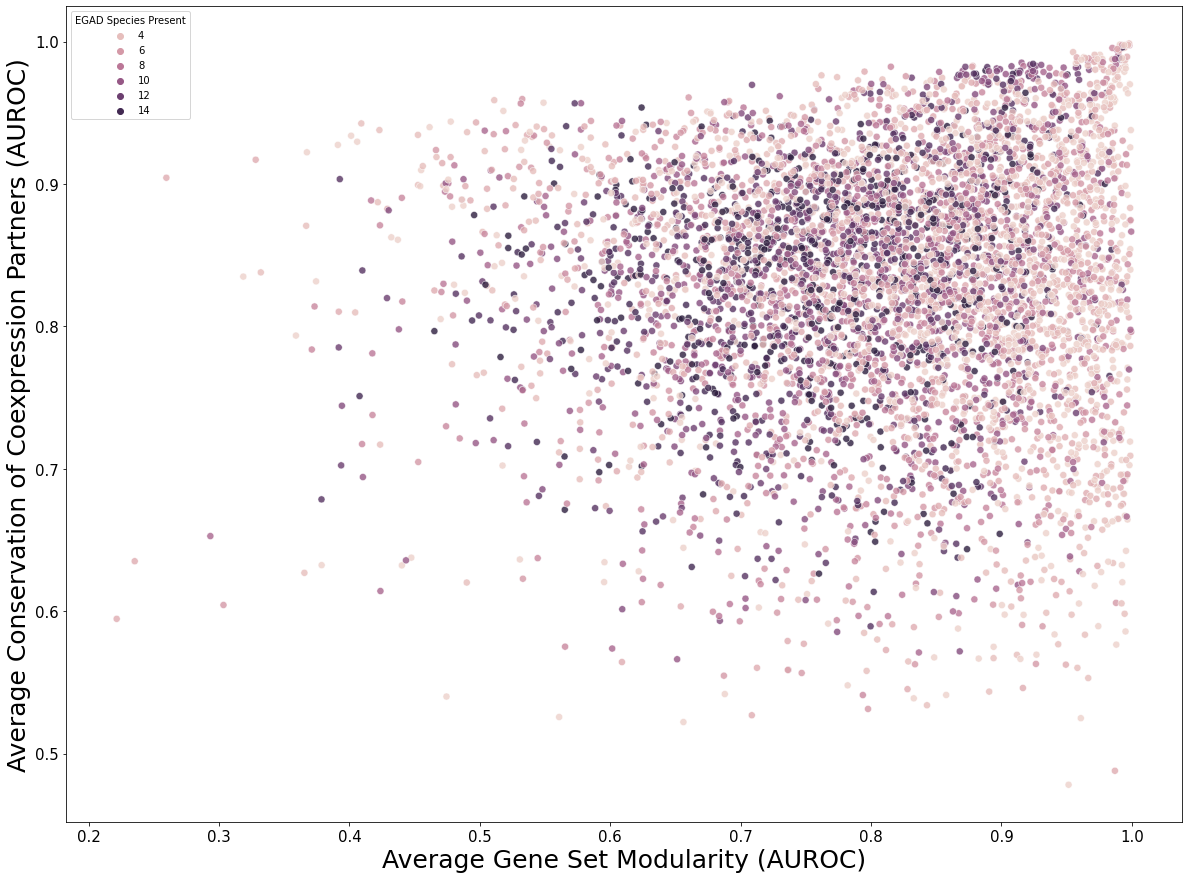

In [32]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = trimmed_plotting_frame,y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'dimgray', alpha = .8, hue = 'EGAD Species Present')

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

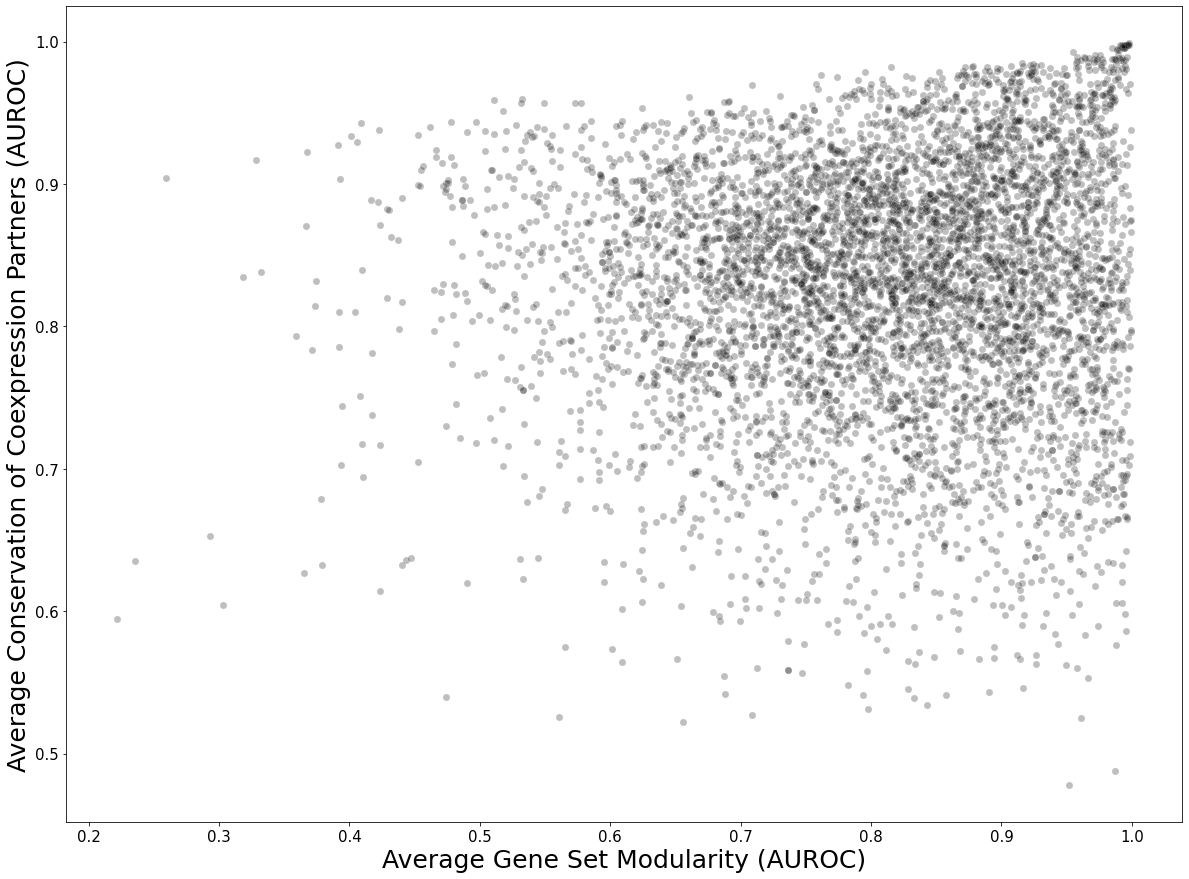

In [33]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = trimmed_plotting_frame,y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'black', alpha = .25, )

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

(array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

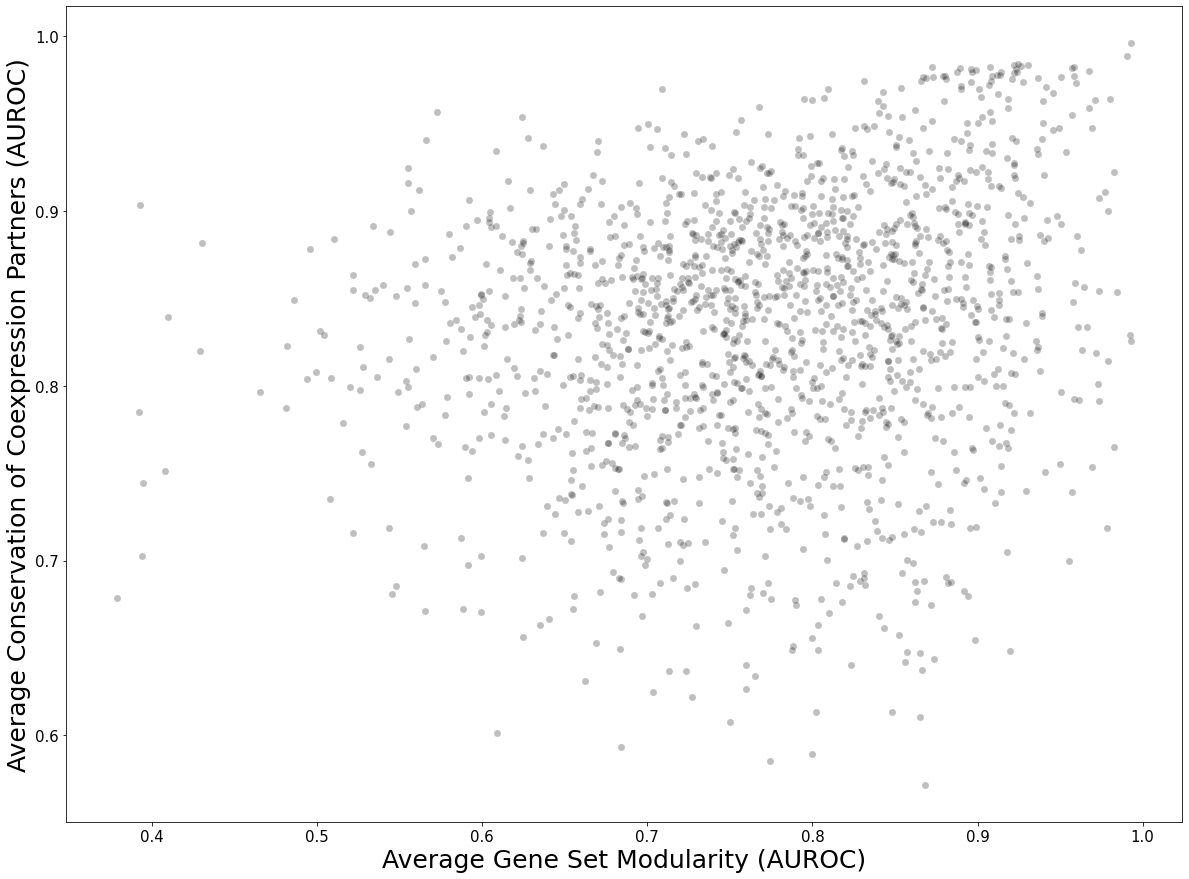

In [34]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>10) & (final_plotting_frame['FC Species Present']>10)],y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'black', alpha = .25,)

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

In [ ]:
final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>10) & (final_plotting_frame['FC Species Present']>10)]

In [ ]:
#limited_set = pd.read_csv('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/Ortho_cross_all_tables/gene_based_over_10_species.csv',index_col= 0)

In [ ]:
#limited_set = pd.read_csv('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/gene_based_all_species.csv',index_col= 0)

In [ ]:
final_plotting_frame.loc[final_plotting_frame.index.isin(limited_set.index)]

In [ ]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = final_plotting_frame.loc[final_plotting_frame.index.isin(limited_set.index)],y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'black', alpha = .25,)

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

In [ ]:
modded_plotting_frame = final_plotting_frame.loc[final_plotting_frame.index.isin(limited_set.index)].copy()

In [ ]:
modded_plotting_frame

In [ ]:
modded_plotting_frame = modded_plotting_frame.rename(columns = {'AVG FC':'ORTHO FC',})

In [ ]:
doubled_data = limited_set.merge(right = modded_plotting_frame[['ORTHO FC']], left_index=True, right_index= True)
doubled_data

In [ ]:
doubled_data['Improvement from ORTHO'] = doubled_data['ORTHO FC'] - doubled_data['AVG FC']
doubled_data

In [ ]:
doubled_data.mean()

In [ ]:
doubled_data.mean()

In [ ]:
fig, ax = plt.subplots(figsize = (20,15))
sns.kdeplot(data = final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>9) & (final_plotting_frame['FC Species Present']>9)],y = 'AVG FC',x = 'AVG EGAD',fill=True, thresh=0, levels=20, cmap="mako")

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

In [ ]:
current_table

In [ ]:
current_combination

In [ ]:
current_combination[0]

In [ ]:
cur

In [ ]:
current_table.loc[current_table['sorghum'].isin(current_og_groups['Symbol'].to_list())]

In [ ]:
current_og_groups

In [ ]:
current_og_groups.merge(how = 'left', left_on = "Symbol",right_on=current_combination[0], right = current_table[[current_combination[0],current_combination[1],'Total Score']] )

In [ ]:
merged_groups.head(50)

In [ ]:
current_species_taxa

In [ ]:
species_with_nets

In [ ]:
current_table

In [ ]:
all_fc_scores.sum().head(50)

In [ ]:
mean_fc = merged_groups[['Orthogroup','Total Score']].groupby('Orthogroup').mean()
mean_fc


In [ ]:
    species_specific_df = pd.DataFrame(index = egad_scores.index)


In [ ]:
species_specific_df.merge(right = mean_fc,left_index=True,right_index=True, how = 'left')


In [ ]:
species_specific_df

In [ ]:
all_group_annotations = pd.DataFrame(columns = ['Avg FC','Avg EGAD', 'Species Present'], index = og_groups['Orthogroup'].unique())

In [ ]:
all_group_annotations

In [ ]:
# for group in tqdm.tqdm(all_group_annotations.index):
#     genes = og_groups.loc[og_groups['Orthogroup'] == group]
#     num_species = len(genes['Species'].unique())
#     all_group_annotations.loc[group,'Species Present'] = num_species
all_group_annotations= pickle.load(open('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_numbers.p','rb'))


In [ ]:
all_group_annotations

In [ ]:
all_group_annotations.to_csv('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_number_species.csv')

In [ ]:
file_genes = open('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_numbers.p','wb')
pickle.dump(all_group_annotations,file_genes)
file_genes.close()

In [ ]:
all_orthogroups= pickle.load(open('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_numbers.p','rb'))


In [ ]:
over_3_groups_annotated = all_group_annotations.loc[all_group_annotations['Species Present']>3]
over_3_groups_annotated

In [ ]:
list_of_species = species_with_nets_to_run['Species'].to_list()
list_of_species

In [ ]:
egad_dataframe = pd.DataFrame(columns = list_of_species, index = over_3_groups_annotated.index,)
egad_dataframe

In [ ]:
for species in tqdm.tqdm(list_of_species):
    current_coconet = CococoNet_reader.read_cococonet(species)
    


In [ ]:
over_3_groups_annotated.

In [ ]:
all_group_annotations

In [ ]:
all_group_annotations

In [ ]:
num_species = len(genes['Species'].unique())
num_species

In [ ]:
genes